# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [62]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [63]:
# PERFORM API CALLS

url = "http://api.openweathermap.org/data/2.5/weather?"

# remember to remove
cities = cities[0:500]

city_data = []
print ('Beginning Data Retrieval')
print ('------------------------')

counter = 1
set = 1

for x, city in enumerate(cities):
    if (x % 50 == 0 and x >= 50):
        set +=1
        counter = 0
        
    query_url = url + 'units=Imperial' + '&appid=' + api_key + '&q=' + city    
    print(query_url)  
    print('Processing Record %s of Set %s | %s' % (counter, set, city))
    
    counter  +=1
    
    try:
        city_weather = requests.get(query_url).json()
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        city_data.append({'City': city,
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country, 
                          'Date': city_date})
       
    except:
        print('City not found. Skipping...')
        pass
    
print('Data Retrieval Complete')

Beginning Data Retrieval
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=gornopravdinsk
Processing Record 1 of Set 1 | gornopravdinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=little current
Processing Record 2 of Set 1 | little current
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=victor harbor
Processing Record 3 of Set 1 | victor harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=vaini
Processing Record 4 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=rikitea
Processing Record 5 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=san cristobal
Processing Record 6 of Set 1 | san cristobal
ht

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=taolanaro
Processing Record 2 of Set 2 | taolanaro
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=laguna
Processing Record 3 of Set 2 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=buin
Processing Record 4 of Set 2 | buin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=georgetown
Processing Record 5 of Set 2 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=bengkulu
Processing Record 6 of Set 2 | bengkulu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=berdigestyakh
Processing Record 7 of Set 2 | berdigestyakh
http://api.openweathermap.or

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=nemuro
Processing Record 4 of Set 3 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=itamarandiba
Processing Record 5 of Set 3 | itamarandiba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=belushya guba
Processing Record 6 of Set 3 | belushya guba
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=bluff
Processing Record 7 of Set 3 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=hermanus
Processing Record 8 of Set 3 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=vieques
Processing Record 9 of Set 3 | vieques
http://api.openweathermap.org/data/2.5/weather?units=I

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=ahuimanu
Processing Record 7 of Set 4 | ahuimanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=wa
Processing Record 8 of Set 4 | wa
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=jambi
Processing Record 9 of Set 4 | jambi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=lolua
Processing Record 10 of Set 4 | lolua
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=cairns
Processing Record 11 of Set 4 | cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=wanning
Processing Record 12 of Set 4 | wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperi

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=tiksi
Processing Record 10 of Set 5 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=geraldton
Processing Record 11 of Set 5 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=dzaoudzi
Processing Record 12 of Set 5 | dzaoudzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=camacupa
Processing Record 13 of Set 5 | camacupa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=saint-louis
Processing Record 14 of Set 5 | saint-louis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=torbay
Processing Record 15 of Set 5 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=camopi
Processing Record 14 of Set 6 | camopi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=port blair
Processing Record 15 of Set 6 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=ostrovnoy
Processing Record 16 of Set 6 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=anadyr
Processing Record 17 of Set 6 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=coihaique
Processing Record 18 of Set 6 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=port lincoln
Processing Record 19 of Set 6 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e4

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=mount gambier
Processing Record 18 of Set 7 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=san vicente
Processing Record 19 of Set 7 | san vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=mezen
Processing Record 20 of Set 7 | mezen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=coos bay
Processing Record 21 of Set 7 | coos bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=umm kaddadah
Processing Record 22 of Set 7 | umm kaddadah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=manzhouli
Processing Record 23 of Set 7 | manzhouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=krasnoselkup
Processing Record 21 of Set 8 | krasnoselkup
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=tautira
Processing Record 22 of Set 8 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=wulanhaote
Processing Record 23 of Set 8 | wulanhaote
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=vrangel
Processing Record 24 of Set 8 | vrangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=billings
Processing Record 25 of Set 8 | billings
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=louisbourg
Processing Record 26 of Set 8 | louisbourg
City not found

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=pasni
Processing Record 24 of Set 9 | pasni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=lata
Processing Record 25 of Set 9 | lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=eureka
Processing Record 26 of Set 9 | eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=srednekolymsk
Processing Record 27 of Set 9 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=titay
Processing Record 28 of Set 9 | titay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=sabancuy
Processing Record 29 of Set 9 | sabancuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=igrim
Processing Record 27 of Set 10 | igrim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=miles city
Processing Record 28 of Set 10 | miles city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=bocas del toro
Processing Record 29 of Set 10 | bocas del toro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=san ignacio
Processing Record 30 of Set 10 | san ignacio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=atasu
Processing Record 31 of Set 10 | atasu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fc65e487b68abac076d6be8b3f7b2af3&q=warmbad
Processing Record 32 of Set 10 | warmbad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=

In [64]:
city_data

[{'City': 'gornopravdinsk',
  'Lat': 60.06,
  'Lng': 69.92,
  'Max Temp': 49.39,
  'Humidity': 65,
  'Cloudiness': 36,
  'Wind Speed': 10.76,
  'Country': 'RU',
  'Date': 1554711311},
 {'City': 'little current',
  'Lat': 45.98,
  'Lng': -81.93,
  'Max Temp': 37.4,
  'Humidity': 100,
  'Cloudiness': 90,
  'Wind Speed': 13.87,
  'Country': 'CA',
  'Date': 1554709800},
 {'City': 'victor harbor',
  'Lat': -35.55,
  'Lng': 138.62,
  'Max Temp': 68,
  'Humidity': 60,
  'Cloudiness': 75,
  'Wind Speed': 19.46,
  'Country': 'AU',
  'Date': 1554711190},
 {'City': 'vaini',
  'Lat': 15.34,
  'Lng': 74.49,
  'Max Temp': 95,
  'Humidity': 19,
  'Cloudiness': 40,
  'Wind Speed': 6.93,
  'Country': 'IN',
  'Date': 1554706800},
 {'City': 'rikitea',
  'Lat': -23.12,
  'Lng': -134.97,
  'Max Temp': 76.75,
  'Humidity': 100,
  'Cloudiness': 0,
  'Wind Speed': 5.17,
  'Country': 'PF',
  'Date': 1554711312},
 {'City': 'san cristobal',
  'Lat': -0.39,
  'Lng': -78.55,
  'Max Temp': 55.4,
  'Humidity': 93,
 

In [66]:
city_weather['coord']

{'lon': -117.28, 'lat': 55.07}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
#Display the DataFrame
city_data_pd = pd.DataFrame(city_data)

latitude=city_data_pd['Lat']
max_temperature=city_data_pd['Max Temp']
humidity=city_data_pd['Humidity']
cloudiness=city_data_pd['Cloudiness']
wind_speed=city_data_pd['Wind Speed']

# Export the city data into a .csv
city_data_pd.to_csv=(output_data_file)


city_data_pd.count()



City          454
Cloudiness    454
Country       454
Date          454
Humidity      454
Lat           454
Lng           454
Max Temp      454
Wind Speed    454
dtype: int64

In [68]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,gornopravdinsk,36,RU,1554711311,65,60.06,69.92,49.39,10.76
1,little current,90,CA,1554709800,100,45.98,-81.93,37.40,13.87
2,victor harbor,75,AU,1554711190,60,-35.55,138.62,68.00,19.46
3,vaini,40,IN,1554706800,19,15.34,74.49,95.00,6.93
4,rikitea,0,PF,1554711312,100,-23.12,-134.97,76.75,5.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

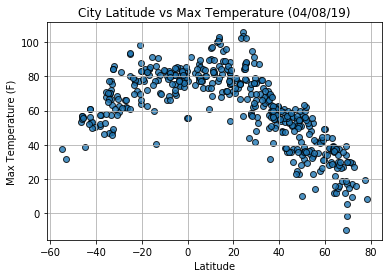

In [69]:
# Potting data 'Latitud vs Temperature'
plt.scatter(latitude,
            max_temperature,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label='Cities')

plt.title('City Latitude vs Max Temperature (%s)' % time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('Fig1')
plt.show()


#### Latitude vs. Humidity Plot

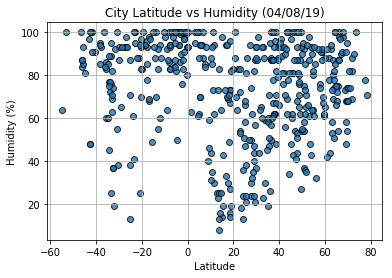

In [70]:
plt.scatter(latitude,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

plt.title('City Latitude vs Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('Fig2')
plt.show()


#### Latitude vs. Cloudiness Plot

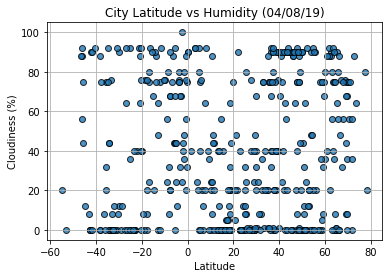

In [71]:
plt.scatter(latitude,
            cloudiness,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

plt.title('City Latitude vs Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('Fig3')
plt.show()


#### Latitude vs. Wind Speed Plot

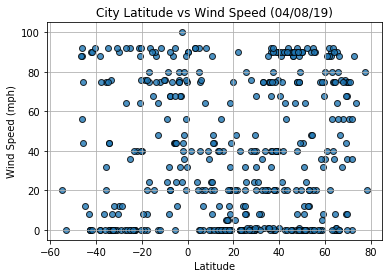

In [72]:
plt.scatter(latitude,
            cloudiness,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

plt.title('City Latitude vs Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('Fig4')
plt.show()